In [420]:
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from scipy import stats

In [431]:
def linear_Regression(X_train,X_test,y_train,y_test):
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    pred=lr.predict(X_train)
    print(f'Linear Regression R2 train: {lr.score(X_train,y_train)}')
    print(f'Linear Regression MSE: {mean_squared_error(y_train,pred)}')
    pred=lr.predict(X_test)
    print(f'Linear Regression R2 test: {lr.score(X_test,y_test)}')
    print(f'Linear Regression MSE: {mean_squared_error(y_test,pred)}')
    print(f'Mean absolute error: {mean_absolute_error(y_test,pred)}')
    scores = cross_val_score(lr, X_test, y_test, cv=kfold)
    print(scores)
    h=sns.jointplot(pred, y_test, kind='reg')
    h.ax_joint.set_xlabel('$\\sf{Predicted\ Price}$')

def lasso_Regression(X_train,X_test,y_train,y_test):
    lr=Lasso(0.01)
    lr.fit(X_train,y_train)
    pred=lr.predict(X_train)
    print(f'Lasso Regression R2 train: {lr.score(X_train,y_train)}')
    print(f'Lasso Regression MSE: {mean_squared_error(y_train,pred)}')
    pred=lr.predict(X_test)
    print(f'Lasso Regression R2 test: {lr.score(X_test,y_test)}')
    print(f'Lasso Regression MSE: {mean_squared_error(y_test,pred)}')
    print(f'Mean absolute error: {mean_absolute_error(y_test,pred)}')
    scores = cross_val_score(lr, X_test, y_test, cv=kfold)
    print(scores.mean())
    h=sns.jointplot(pred, y_test, kind='reg')
    h.ax_joint.set_xlabel('$\\sf{Predicted\ Price}$')
    
    
def ridge_Regression(X_train,X_test,y_train,y_test):
    lr=Ridge()
    lr.fit(X_train,y_train)
    pred=lr.predict(X_train)
    print(f'Ridge Regression R2 train: {lr.score(X_train,y_train)}')
    print(f'Ridge Regression MSE: {mean_squared_error(y_train,pred)}')
    pred=lr.predict(X_test)
    print(f'Ridge Regression R2 test: {lr.score(X_test,y_test)}')
    print(f'Ridge Regression MSE: {mean_squared_error(y_test,pred)}')
    print(f'Mean absolute error: {mean_absolute_error(y_test,pred)}')
    scores = cross_val_score(lr, X_test, y_test, cv=kfold)
    print(scores.mean())
    h=sns.jointplot(pred, y_test, kind='reg')
    h.ax_joint.set_xlabel('$\\sf{Predicted\ Price}$')
    
def elastic_Regression(X_train,X_test,y_train,y_test):
    lr=ElasticNet()
    lr.fit(X_train,y_train)
    pred=lr.predict(X_train)
    print(f'Elastic Regression R2 train: {lr.score(X_train,y_train)}')
    print(f'Elastic Regression MSE: {mean_squared_error(y_train,pred)}')
    pred=lr.predict(X_test)
    print(f'Elastic Regression R2 test: {lr.score(X_test,y_test)}')
    print(f'Elastic Regression MSE: {mean_squared_error(y_test,pred)}')
    print(f'Mean absolute error: {mean_absolute_error(y_test,pred)}')
    scores = cross_val_score(lr, X_test, y_test, cv=kfold)
    print(scores.mean())
    
def poly_regression(X_train,X_test,y_train,y_test):
    poly = PolynomialFeatures()

    lm_poly = LinearRegression()
    lm_poly.fit(poly.fit_transform(X_train), y_train)
    y_pred = lm_poly.predict(poly.transform(X_train))
    print(f'Polynomial Regression R2 train: {lr.score(X_train,y_train)}')
    print(f'Polynomial Regression MSE: {mean_squared_error(y_train,y_pred)}')
    y_pred = lm_poly.predict(poly.transform(X_test))
    print(f'Polynomial Regression R2 test: {lr.score(X_test,y_test)}')
    print(f'Polynomial Regression MSE: {mean_squared_error(y_test,y_pred)}')
    print(f'Mean absolute error: {mean_absolute_error(y_test,pred)}')
    print("Polynomial Regression:", r2_score(y_test, y_pred))
    scores = cross_val_score(lm_poly, X_test, y_test, cv=kfold)
    print(scores.mean())
    
def des_num(df,col_name):
    print(f"\nColumn: {col_name}")
    print(f"\nMinimum: {df[col_name].min()}")
    print(f"\nMaximum: {df[col_name].max()}")
    print(f"\nAverage: {df[col_name].mean()}")
    print(f"\nStandard Deviation: {df[col_name].std()}")
    print(f"\nMedian: {df[col_name].median()}")
    
def randomForest_regression(X_train, X_test, y_train, y_test):
    rf = RandomForestRegressor(n_estimators=2000, max_features=10, max_depth=4)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_train)
    print('Train Random Forests R2: {}'.format(r2_score(y_train, y_pred)))
    y_pred = rf.predict(X_test)
    print('Test Random Forests R2: {}'.format(r2_score(y_test, y_pred)))
    rf_mse=mean_squared_error(y_test,rf.predict(X_test))
    print('Root mean squared Random Forest:{}'.format(rf_mse))
    scores = cross_val_score(rf_mse, X_test, y_test, cv=kfold)
    print(scores)
    
def int_encoding(df,variable, ordinal_mapping):
    df[variable]=df[variable].map(ordinal_mapping)

In [215]:
skin_type=['Oily skin Type','Normal skin Type','Dry skin Type','Combination skin Type','Sensitive']

In [216]:
seph1=pd.read_csv('sephora_data_overall_updated_1.csv')
seph1.head()

,brand,Product,Type,Reviews,Price,Number of Likes,Number of Reviews,Normal skin Type,Oily skin Type,Dry skin Type,...,Ceramide,Squalane,Hyaluronic Acid,Vitamin E,Titanium Dioxide,Glycolic Acid,Sodium Acetate,Sodium Benzoate,Sodium Hyaluronate,Panthenol
0,AMOREPACIFIC,Color Control Cushion Compact Broad Spectrum S...,cushion,4.0,75.0,37500,1100,1,1,1,...,0,0,0,0,1,0,0,0,0,0
1,Dior,Dreamskin Fresh Perfect Cushion Broad Spectrum...,cushion,4.0,82.0,20100,200,1,1,1,...,0,0,0,0,1,0,0,1,0,0
2,Dior,Dior Forever Loose Cushion Powder,cushion,3.5,58.0,5100,9,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,La Mer,The Luminous Lifting Cushion Foundation SPF 20...,cushion,4.0,125.0,12400,70,1,1,1,...,0,0,0,0,1,0,0,0,0,0
4,Dior,Dreamskin Fresh Perfect Cushion Broad Spectrum...,cushion,4.5,42.0,9700,39,1,1,1,...,0,0,0,0,1,0,0,1,0,0


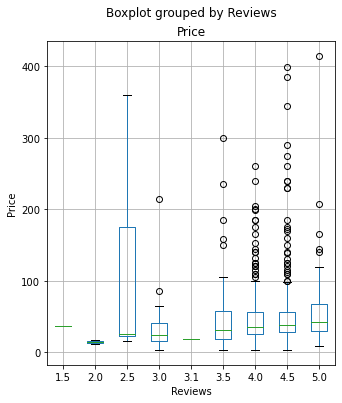

In [256]:
seph1.boxplot('Price','Reviews',figsize=(5,6))
plt.xlabel('Reviews')
plt.ylabel('Price')
plt.savefig('Boxplot grouped by Reviews Price',bbox_inches='tight',dpi=300)

In [85]:
df=seph1.drop(['brand','Product','Type','Price'],1)

C:\Users\hancc\AppData\Local\Temp/ipykernel_29340/1107923057.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=seph1.drop(['brand','Product','Type','Price'],1)


In [86]:
seph1.dtypes

brand                     object
Product                   object
Type                      object
Reviews                  float64
Price                    float64
Number of Likes            int64
Number of Reviews          int64
Normal skin Type           int64
Oily skin Type             int64
Dry skin Type              int64
Combination skin Type      int64
Sensitive                  int64
Ascorbic Acid              int64
Niacinamide                int64
Retinol                    int64
Ceramide                   int64
Squalane                   int64
Hyaluronic Acid            int64
Vitamin E                  int64
Titanium Dioxide           int64
Glycolic Acid              int64
Sodium Acetate             int64
Sodium Benzoate            int64
Sodium Hyaluronate         int64
Panthenol                  int64
dtype: object

In [394]:
ingred_list=['Retinol','Ascorbic Acid','Niacinamide','Ceramide','Squalane','Hyaluronic Acid','Vitamin E','Titanium Dioxide',
            'Glycolic Acid','Sodium Acetate','Sodium Benzoate','Sodium Hyaluronate','Panthenol']

In [395]:
seph2=seph1.drop(ingred_list,axis=1)

In [396]:
seph3=seph2.drop(['brand','Product','Type','Price','X','Y','Z'],axis=1)

KeyError: "['X' 'Y' 'Z'] not found in axis"

In [397]:
seph4=seph2.drop(['brand','Product','Type','Price'],axis=1)

In [398]:
#dimension reduction with t-SNE, a statistical method for visualizing high dimensional data by giving
#each datapaoint a location in a 2 or 3 dimensional map. It is based on stochastic neighbor embedding
#First, t-SNE constructs a probability distribution over pairs of high-dimensional objects in such a 
#way that similar objects are assigned a higher probability while dissimilar points are assigned a 
#lower probability. Second, t-SNE defines a similar probability distribution over the points in the 
#low-dimensional map, and it minimizes the Kullback–Leibler divergence (KL divergence) between the 
#two distributions with respect to the locations of the points in the map. While the original algorithm 
#uses the Euclidean distance between objects as the base of its similarity metric, this can be changed as appropriate.
model=TSNE(n_components=3,learning_rate=200)
tsne_features=model.fit_transform(seph3)
seph2['X']=tsne_features[:,0]
seph2['Y']=tsne_features[:,1]
seph2['Z']=tsne_features[:,2]
seph2.head()

C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


,brand,Product,Type,Reviews,Price,Number of Likes,Number of Reviews,Normal skin Type,Oily skin Type,Dry skin Type,Combination skin Type,Sensitive,X,Y,Z
0,AMOREPACIFIC,Color Control Cushion Compact Broad Spectrum S...,cushion,4.0,75.0,37500,1100,1,1,1,1,0,-4.347196,-12.824705,-3.754877
1,Dior,Dreamskin Fresh Perfect Cushion Broad Spectrum...,cushion,4.0,82.0,20100,200,1,1,1,1,0,-15.644566,-2.192692,-0.768401
2,Dior,Dior Forever Loose Cushion Powder,cushion,3.5,58.0,5100,9,0,0,0,0,0,13.761798,4.633103,-4.952301
3,La Mer,The Luminous Lifting Cushion Foundation SPF 20...,cushion,4.0,125.0,12400,70,1,1,1,1,0,-5.726125,1.596612,10.900661
4,Dior,Dreamskin Fresh Perfect Cushion Broad Spectrum...,cushion,4.5,42.0,9700,39,1,1,1,1,0,-0.777821,9.432464,9.445711


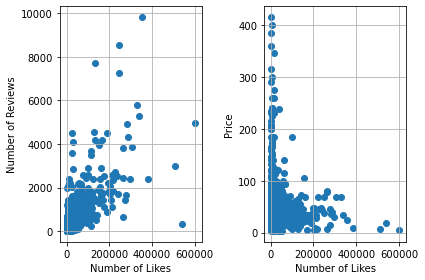

In [399]:
plt.subplot(1,2,1)
plt.scatter(x=seph1['Number of Likes'],y=seph1['Number of Reviews'],)
plt.ylabel('Number of Reviews')
plt.xlabel('Number of Likes')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(x=seph1['Number of Likes'],y=seph1['Price'],)
plt.ylabel('Price')
plt.xlabel('Number of Likes')
plt.grid()
plt.tight_layout()

plt.savefig('Scatter plot of Reviews and Price against Likes',bbox_inches='tight',dpi=300)

In [400]:
seph2.dtypes

brand                     object
Product                   object
Type                      object
Reviews                  float64
Price                    float64
Number of Likes            int64
Number of Reviews          int64
Normal skin Type           int64
Oily skin Type             int64
Dry skin Type              int64
Combination skin Type      int64
Sensitive                  int64
X                        float32
Y                        float32
Z                        float32
dtype: object

In [401]:
df2=seph2.groupby(['Type']).agg('mean').reset_index()
df2

,Type,Reviews,Price,Number of Likes,Number of Reviews,Normal skin Type,Oily skin Type,Dry skin Type,Combination skin Type,Sensitive,X,Y,Z
0,cleanser,4.357143,29.845893,34279.714286,738.339286,0.875000,0.857143,0.750000,0.857143,0.107143,-1.122779,0.420219,0.428354
1,collagen,4.409091,44.908182,25320.000000,400.272727,0.545455,0.454545,0.545455,0.545455,0.000000,-3.415271,-3.573347,-0.087996
2,cushion,4.222222,60.000000,12588.888889,197.555556,0.777778,0.666667,0.777778,0.777778,0.222222,0.714344,1.899047,1.333194
3,face cream,4.226653,53.483006,26276.895792,454.595190,0.559118,0.474950,0.657315,0.515030,0.050100,-0.314875,0.360992,-1.672757
4,face masks,4.247283,44.075815,29268.195652,436.663043,0.885870,0.820652,0.798913,0.885870,0.076087,-0.242666,-0.399180,-0.050165
5,face mist,4.191489,33.223404,37843.382979,489.978723,0.617021,0.553191,0.617021,0.617021,0.127660,-1.217725,-1.468328,0.819586
6,face oils,4.448276,57.827586,43481.862069,513.655172,0.862069,0.620690,0.931034,0.793103,0.103448,-1.895956,-3.889009,0.252892
7,serum,4.304054,56.188378,58627.027027,591.635135,0.905405,0.824324,0.891892,0.878378,0.040541,0.572616,-1.718813,1.422954
8,sunscreen,4.108696,35.478261,43752.173913,974.000000,0.826087,0.695652,0.782609,0.739130,0.043478,-0.483076,-0.000823,-0.230709
9,toner,4.304348,43.430290,31411.130435,451.768116,0.739130,0.710145,0.753623,0.782609,0.057971,0.245889,0.180220,0.336650


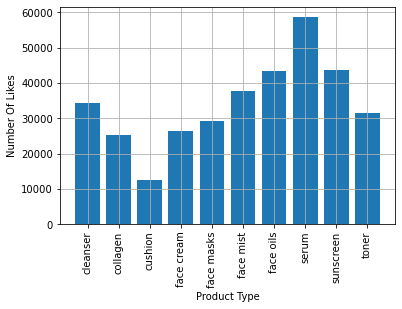

In [402]:
plt.bar(df2['Type'],height=df2['Number of Likes'])
plt.xticks(rotation=90)
plt.ylabel('Number Of Likes')
plt.xlabel('Product Type')
plt.grid()
plt.savefig('Bar chart of Product Type to Number of Likes',bbox_inches='tight',dpi=300)

In [403]:
df3=seph2.groupby(['brand']).agg('mean').reset_index()
df3.sort_values(by=['Number of Likes'],inplace=True,ascending=False)
df5=df3.drop([107]).head(10)
df5.head(10)

,brand,Reviews,Price,Number of Likes,Number of Reviews,Normal skin Type,Oily skin Type,Dry skin Type,Combination skin Type,Sensitive,X,Y,Z
99,NARS,4.500000,30.000000,296600.000000,2390.000000,1.000000,1.000000,1.000000,1.000000,0.000000,13.267321,-5.890271,-1.036348
147,The Ordinary,4.266667,9.043333,205500.000000,1341.533333,0.933333,0.800000,0.933333,0.800000,0.133333,7.693107,-7.436980,0.928351
153,Urban Decay,4.300000,22.200000,153160.000000,723.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.898596,-2.992965,-1.467957
144,Tatcha,4.318182,56.090909,121909.090909,1521.363636,0.909091,0.636364,0.818182,0.818182,0.363636,5.658853,-4.299949,3.257820
63,ILIA,4.000000,36.666667,110866.666667,1084.666667,0.000000,0.000000,0.000000,0.000000,0.000000,3.355464,-9.744479,1.915303
103,OLEHENRIKSEN,4.333333,43.888889,88222.222222,1604.333333,0.888889,1.000000,0.888889,1.000000,0.333333,4.701124,-1.613950,3.985023
49,Fenty Beauty by Rihanna,4.083333,37.333333,87300.000000,659.500000,0.500000,0.166667,0.500000,0.333333,0.000000,2.900568,-2.762232,5.180845
57,Glow Recipe,4.300000,36.933333,85300.000000,1065.600000,1.000000,1.000000,1.000000,1.000000,0.000000,2.456386,-7.579508,3.710077
120,Rare Beauty by Selena Gomez,4.500000,22.500000,82750.000000,439.000000,0.500000,0.500000,0.500000,0.500000,0.000000,3.943786,-7.930115,4.546035
152,Tower 28 Beauty,4.500000,24.000000,76200.000000,514.000000,0.500000,0.500000,0.500000,0.500000,0.000000,-1.088090,-5.916723,-0.791277


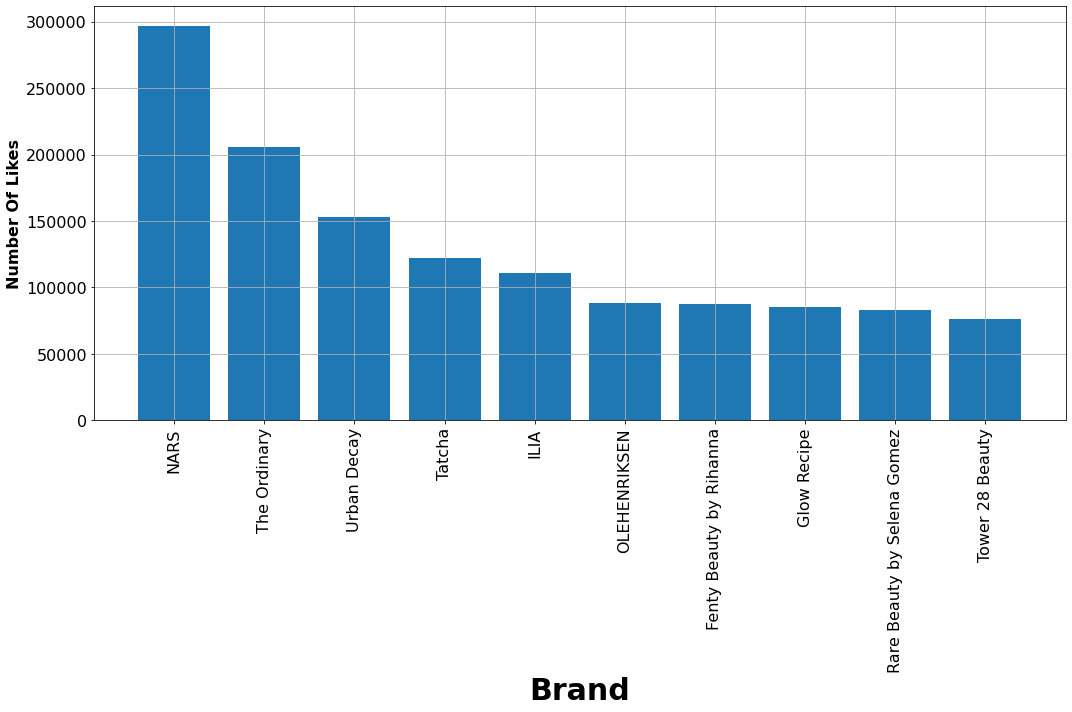

In [404]:
plt.figure(figsize=(15,10))
plt.bar(df5['brand'],height=df5['Number of Likes'])
plt.yticks(fontsize=16)
plt.xticks(rotation=90, fontsize=16)
plt.ylabel('Number Of Likes',weight='bold',fontsize=16)
plt.xlabel('Brand',weight='bold',fontsize=30)
plt.grid()
plt.tight_layout()
plt.savefig('Bar chart of Brand to Number of Likes',bbox_inches='tight',dpi=300)

In [405]:
#list_features=['Reviews','Normal skin Type','Oily skin Type','Dry skin Type','Combination skin Type','Sensitive'
#              ,'Ascorbic Acid','Niacinamide','Retinol','Ceramide','Squalane','Hyaluronic Acid','Vitamin E',
#              'Titanium Dioxide','Sodium Acetate','Sodium Benzoate','Sodium Hyaluronate',
#              'Panthenol','X','Y','Z']
list_features=['Reviews','Normal skin Type','Oily skin Type','Dry skin Type','Combination skin Type','Sensitive'
              ,'Ascorbic Acid','Niacinamide','Retinol','Ceramide','Squalane','Hyaluronic Acid','Vitamin E','Sodium Hyaluronate',
              'X','Y','Z']
list_features=['brand','Type','Reviews','Number of Likes','Number of Reviews','Normal skin Type','Oily skin Type','Dry skin Type','Combination skin Type','Sensitive','X','Y','Z']

In [406]:
X_train, X_test, y_train, y_test=train_test_split(seph2[list_features],seph2['Price'],test_size=0.33,random_state=42)

In [407]:
categories=[]
for var in X_train.columns:
    if X_train[var].dtype=='object':
        categories.append(var)
categories

['brand', 'Type']

In [408]:
seph2[categories].nunique()

brand    178
Type      10
dtype: int64

In [409]:
for var in categories:
    map_values=seph1.groupby([var]).Price.mean().to_dict()
    int_encoding(X_train,var,map_values)
    int_encoding(X_test,var,map_values)

In [486]:
X_train

,brand,Type,Reviews,Number of Likes,Number of Reviews,Normal skin Type,Oily skin Type,Dry skin Type,Combination skin Type,Sensitive,X,Y,Z
311,51.600000,53.483006,4.0,11000,658,1,1,1,1,0,-3.523885,4.679880,9.725991
765,71.588235,53.483006,4.5,5400,843,1,1,1,1,0,11.738190,6.787519,-3.255250
630,39.100000,53.483006,4.5,31200,75,1,1,1,1,0,-9.235579,-9.817580,-6.289031
0,161.250000,60.000000,4.0,37500,1100,1,1,1,1,0,-4.347196,-12.824705,-3.754877
316,56.750000,53.483006,4.0,574,82,1,0,1,1,0,-9.778048,4.473464,-17.627651
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,46.653846,43.430290,4.5,7900,29,1,1,1,1,0,4.085015,13.553041,5.375074
270,74.400000,53.483006,4.0,156700,2380,1,1,1,1,0,11.205252,-4.716683,2.661586
860,26.571429,53.483006,4.5,6800,13,0,0,0,0,0,9.188000,11.097459,2.469898
435,29.000000,44.075815,5.0,4200,98,1,1,1,1,0,10.919405,0.033834,-8.508986


In [410]:
numerical=['Reviews','Number of Likes','Number of Reviews','Normal skin Type','Oily skin Type',
          'Dry skin Type','Combination skin Type','Sensitive','X','Y','Z']

C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


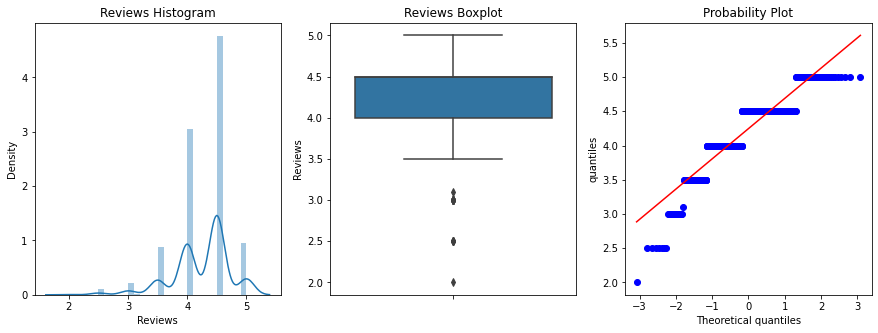

C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


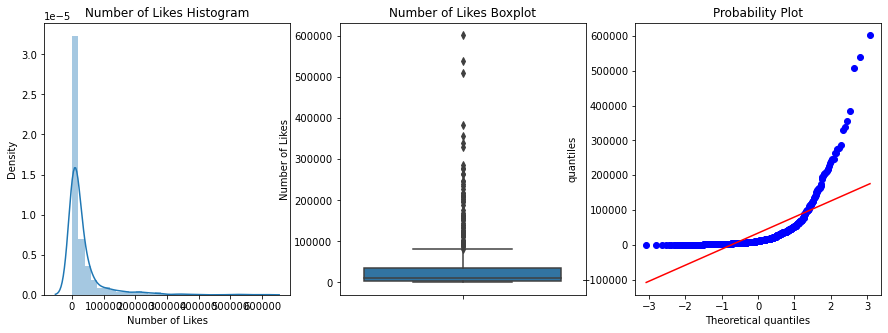

C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


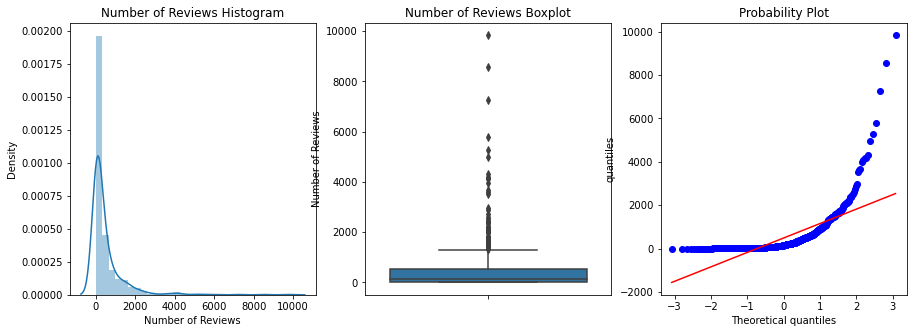

C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


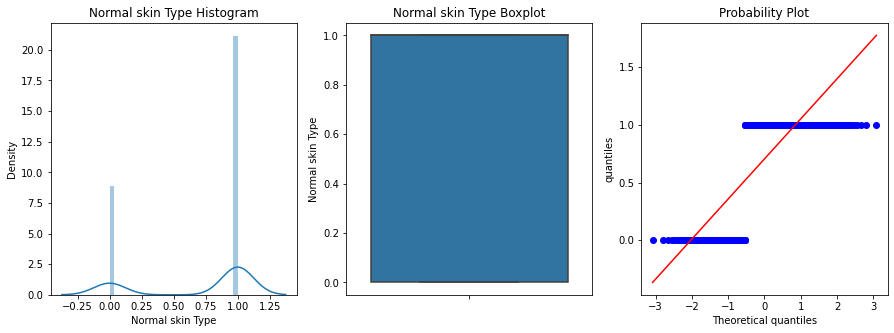

C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


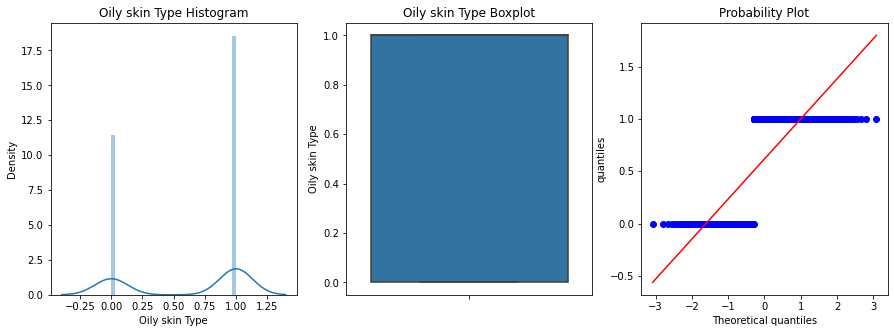

C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


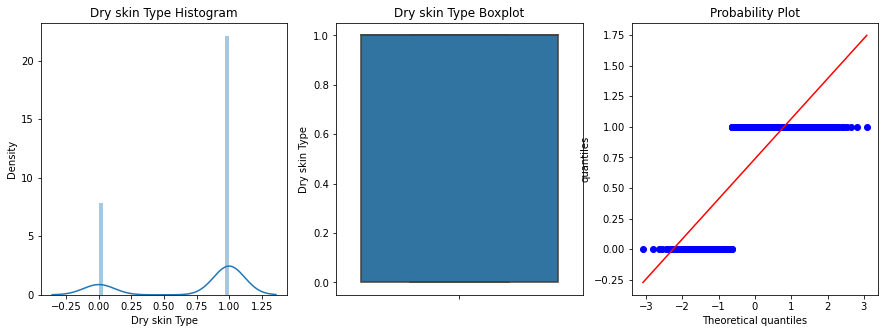

C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


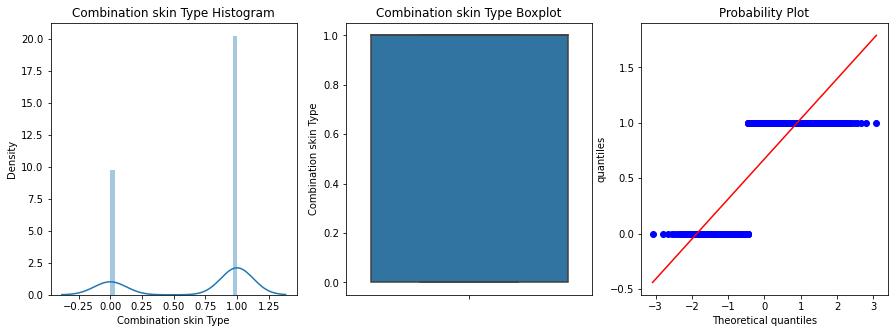

C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


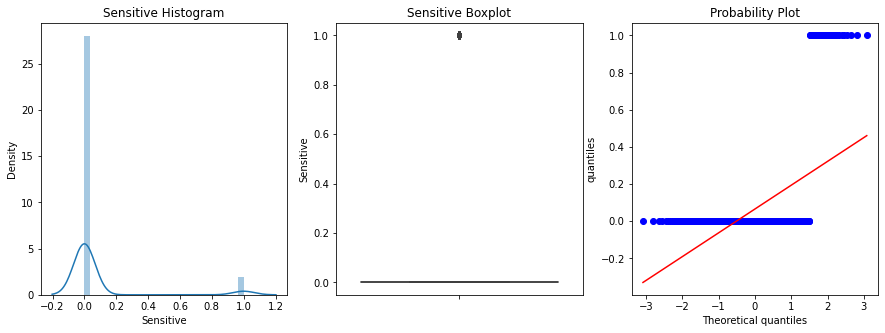

C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


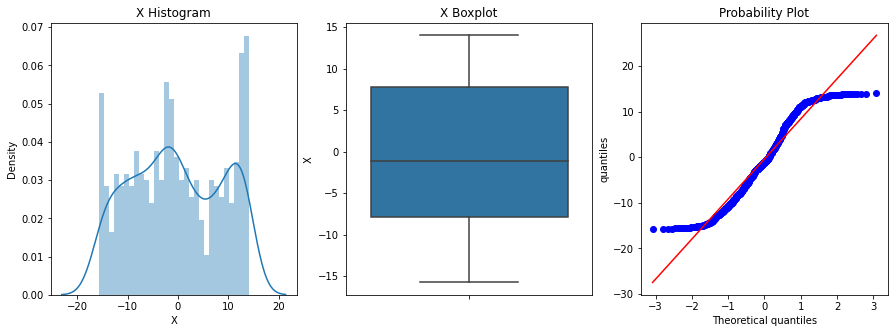

C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


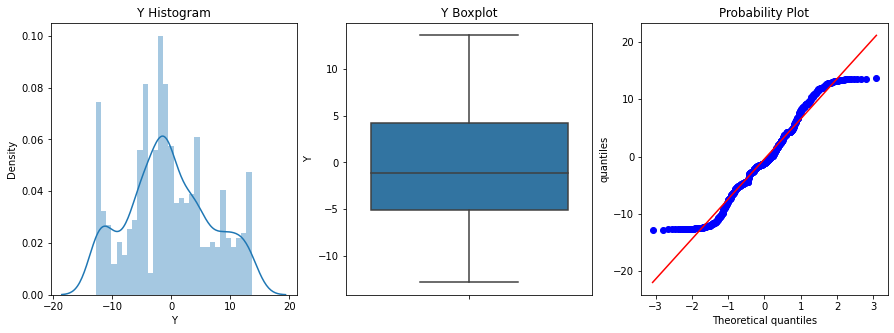

C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


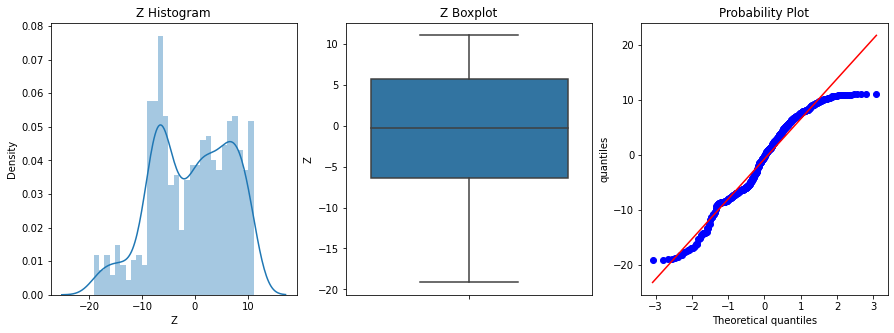

In [426]:
#plot 
for var in numerical:
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    sns.distplot(X_train[var],bins=30)
    plt.title(var+' Histogram')

    #boxplot
    plt.subplot(1,3,2)
    sns.boxplot(y=X_train[var])
    plt.title(var+' Boxplot')
    
    plt.subplot(1,3,3)
    stats.probplot(X_train[var],dist='norm',plot=plt)
    plt.ylabel('quantiles')
    
    plt.show()

<AxesSubplot:>

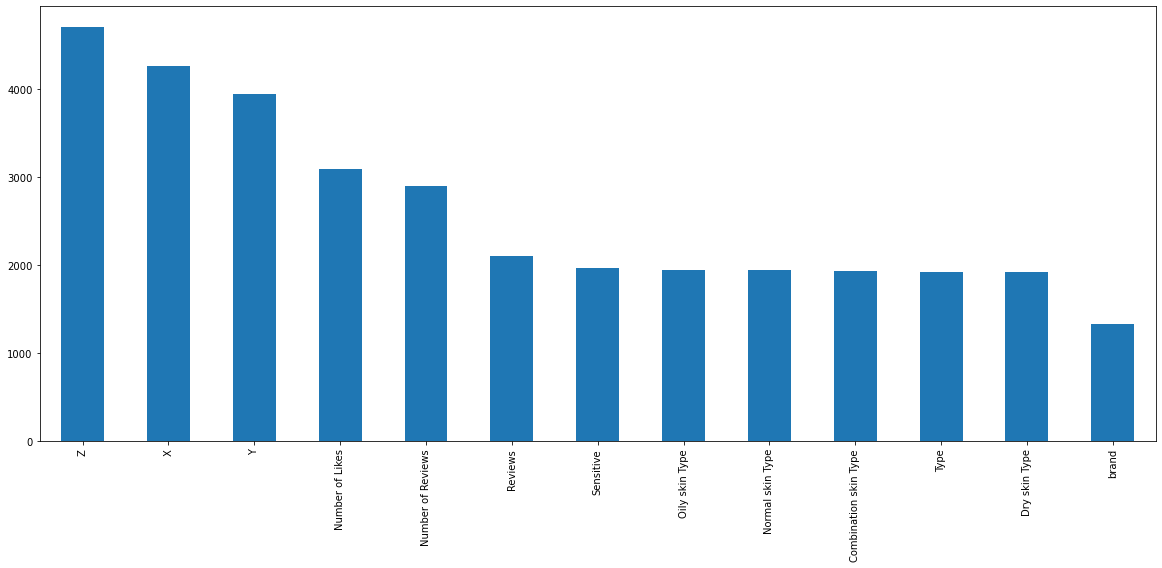

In [412]:
mse_values=[]
for feature in X_train.columns:
    clf=DecisionTreeRegressor()
    clf.fit(X_train[feature].fillna(0).to_frame(),y_train)
    y_scored=clf.predict(X_test[feature].fillna(0).to_frame())
    mse_values.append(mean_squared_error(y_test,y_scored))
mse_values=pd.Series(mse_values)
mse_values.index=X_train.columns
mse_values.sort_values(ascending=False)
mse_values.sort_values(ascending=False).plot.bar(figsize=(20,8))

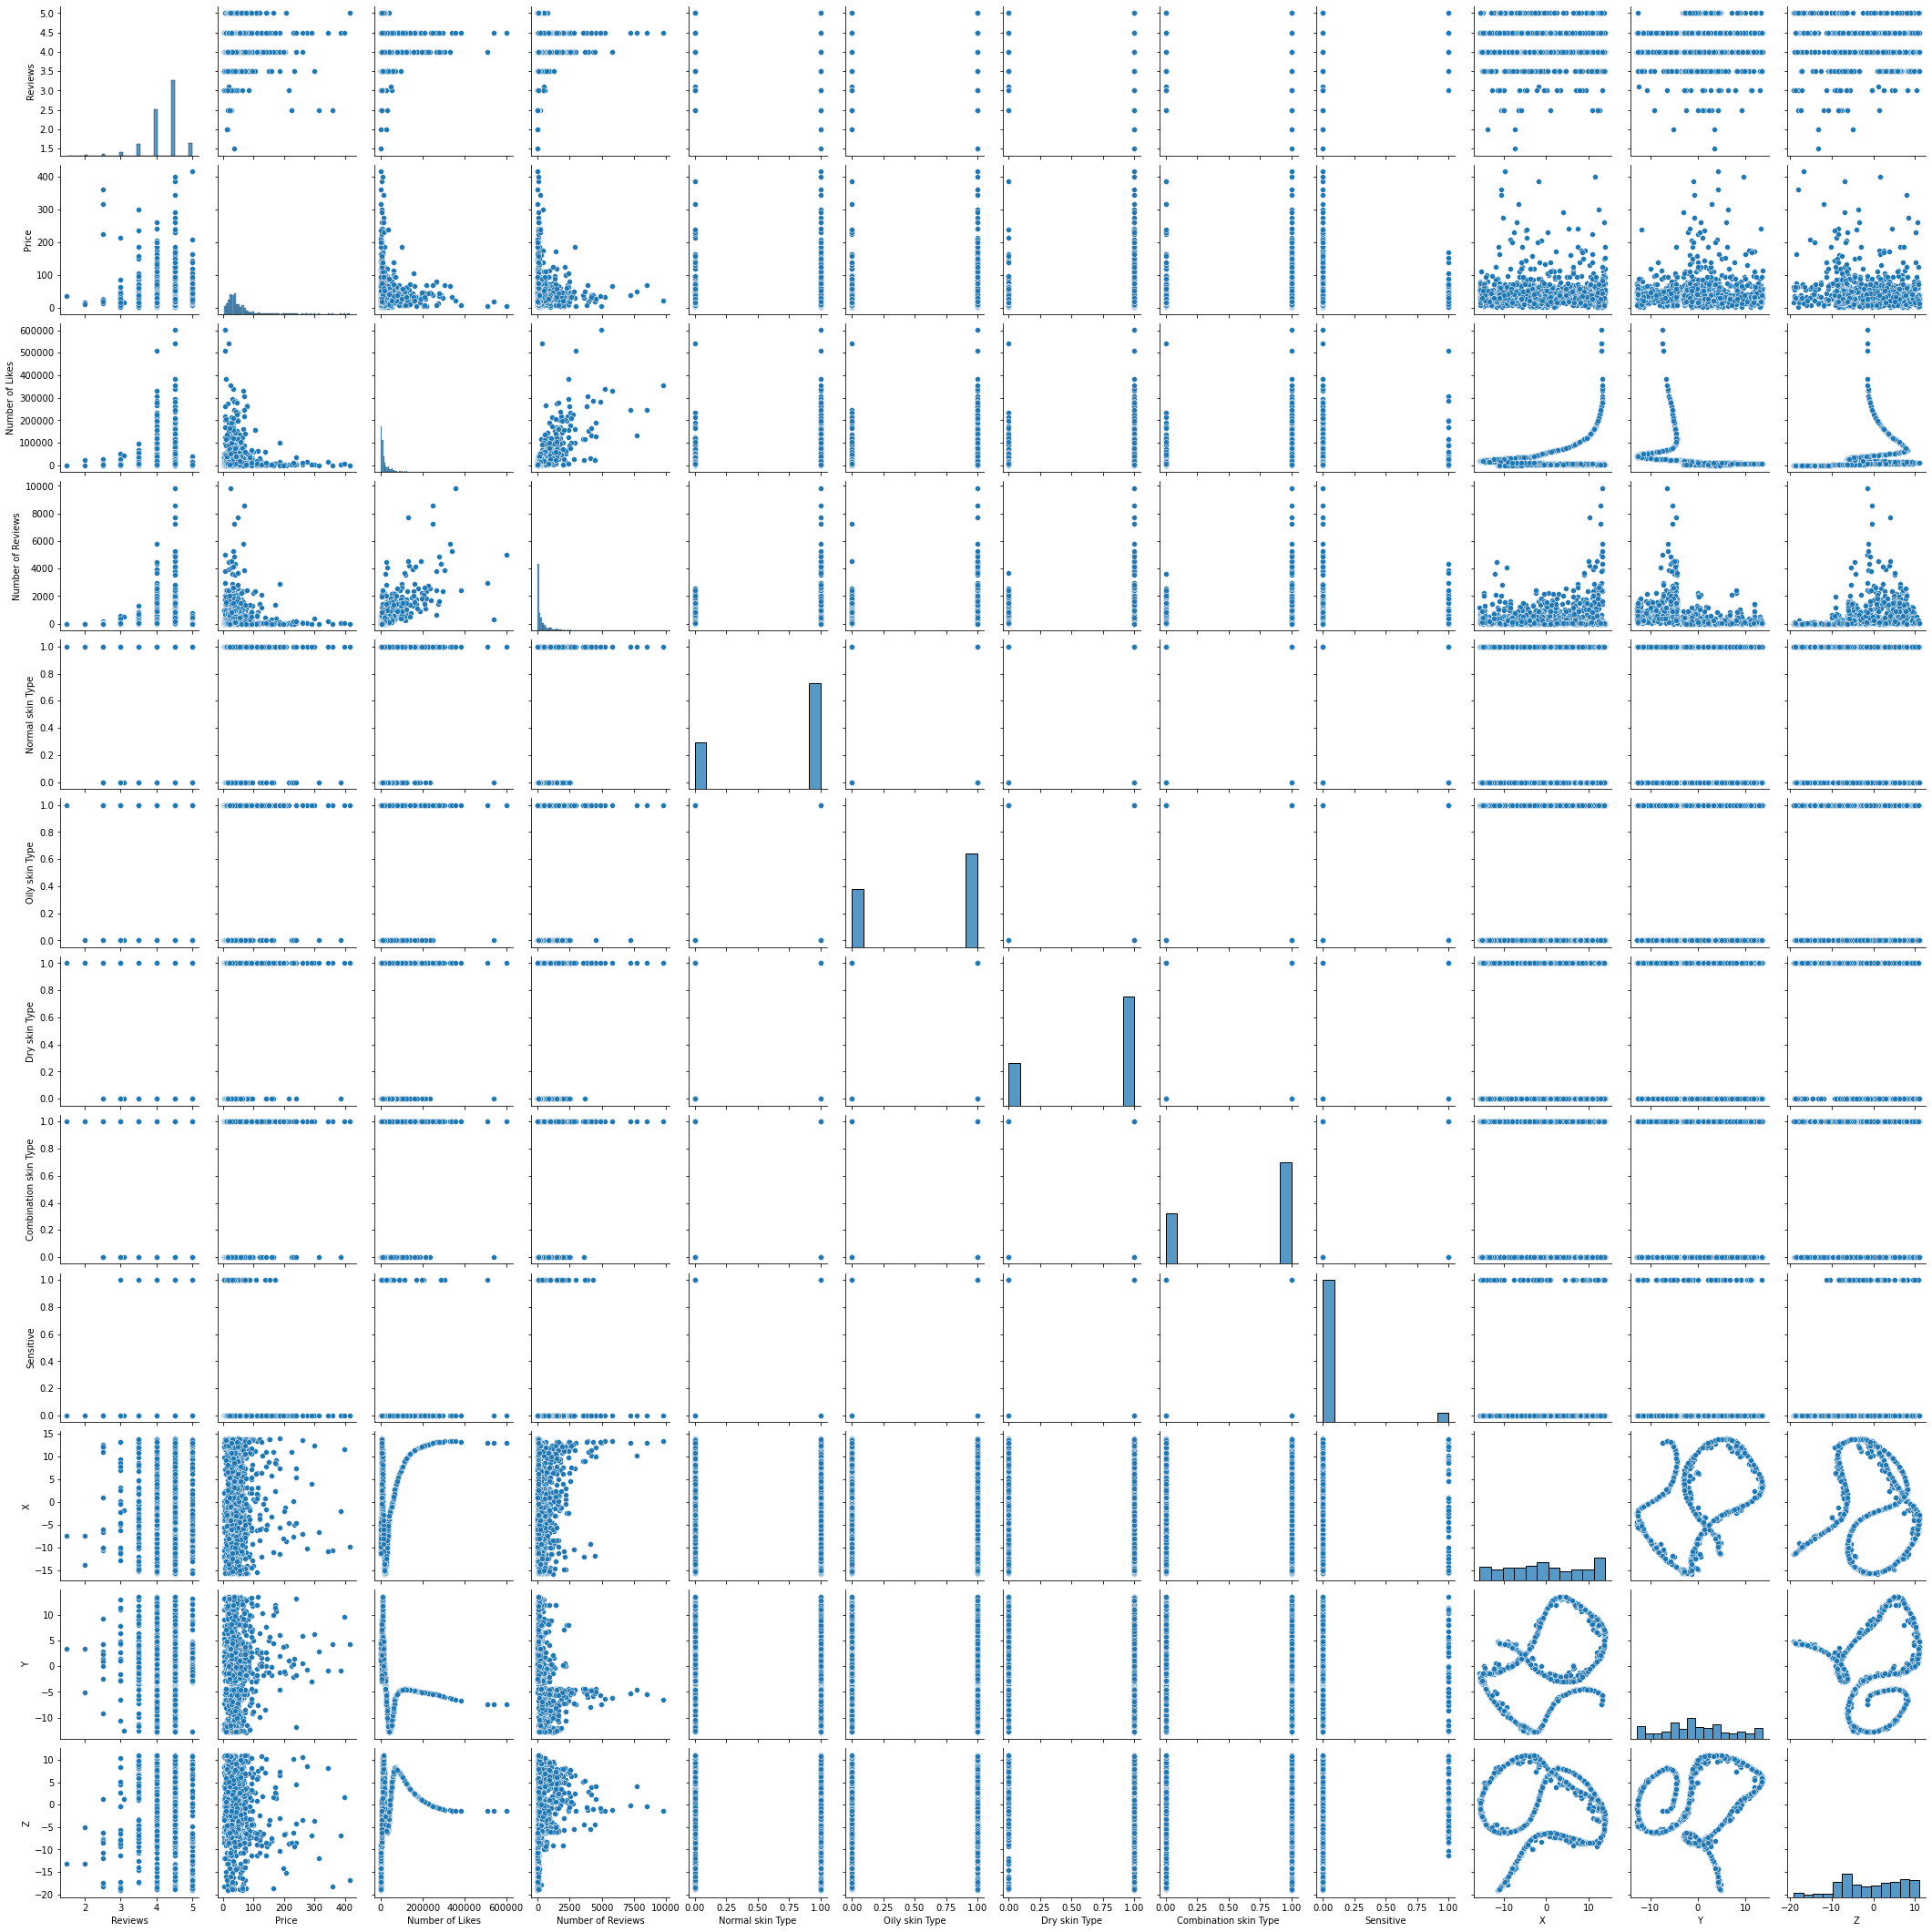

In [413]:
sns.pairplot(seph2)

In [279]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [282]:
#fit a simple linear regression
# Fit a simple linear regression on training set
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.5670345302722142

In [283]:
# Score on validation set
lr.score(X_test,y_test)

0.636223130149077

In [415]:
scores = cross_val_score(lr, X_test, y_test, cv=kfold)
print(scores.mean())

0.6023631423459678


In [414]:
X_train

,brand,Type,Reviews,Number of Likes,Number of Reviews,Normal skin Type,Oily skin Type,Dry skin Type,Combination skin Type,Sensitive,X,Y,Z
311,51.600000,53.483006,4.0,11000,658,1,1,1,1,0,-3.523885,4.679880,9.725991
765,71.588235,53.483006,4.5,5400,843,1,1,1,1,0,11.738190,6.787519,-3.255250
630,39.100000,53.483006,4.5,31200,75,1,1,1,1,0,-9.235579,-9.817580,-6.289031
0,161.250000,60.000000,4.0,37500,1100,1,1,1,1,0,-4.347196,-12.824705,-3.754877
316,56.750000,53.483006,4.0,574,82,1,0,1,1,0,-9.778048,4.473464,-17.627651
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,46.653846,43.430290,4.5,7900,29,1,1,1,1,0,4.085015,13.553041,5.375074
270,74.400000,53.483006,4.0,156700,2380,1,1,1,1,0,11.205252,-4.716683,2.661586
860,26.571429,53.483006,4.5,6800,13,0,0,0,0,0,9.188000,11.097459,2.469898
435,29.000000,44.075815,5.0,4200,98,1,1,1,1,0,10.919405,0.033834,-8.508986


In [174]:
scaler=StandardScaler()
scaler.fit(X_train.fillna(0))
sel_=SelectFromModel(Lasso(alpha=100))
sel_.fit(scaler.transform(X_train),y_train)

X_train_lasso=pd.DataFrame(sel_.transform(X_train))
X_test_lasso=pd.DataFrame(sel_.transform(X_test))

X_train_lasso.columns=X_train.columns[(sel_.get_support())]
X_test_lasso.columns=X_test.columns[(sel_.get_support())]

C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\feature_selection\_base.py:92: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warn(
C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\sklearn\feature_selection\_base.py:92: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warn(


In [175]:
alphas=10**np.linspace(-5,5,200)
lasso_model=LassoCV(alphas=alphas, cv=kfold)
lasso_model.fit(X_train,y_train)
r_squared_train=lasso_model.score(X_train,y_train)
r_squared_test=lasso_model.score(X_test,y_test)
alpha=lasso_model.alpha_
print(f'R squared train: {r_squared_train}')
print(f'R squared test: {r_squared_test}')
print(f'alpha: {alpha}')

R squared train: 0.016394068306329834
R squared test: 0.007756355019697736
alpha: 108.43659686896109


Lasso Regression R2 train: 0.5660309377032223
Lasso Regression MSE: 961.9353226896396
Lasso Regression R2 test: 0.6316673127586745
Lasso Regression MSE: 725.40111247238
Mean absolute error: 16.339801388290724
0.6023631423459678


C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


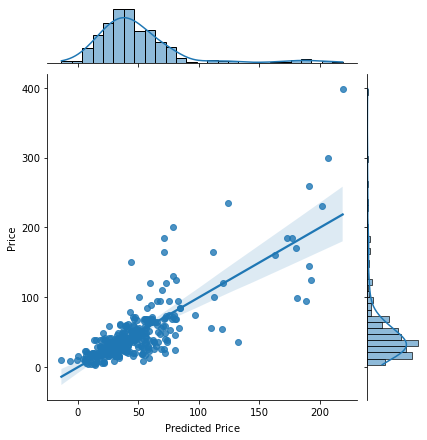

In [432]:
lasso_Regression(X_train,X_test,y_train,y_test)

In [481]:
lr=Lasso(0.01)
lr.fit(X_train,y_train)
pred=lr.predict(X_train)
print(f'Lasso Regression R2 train: {lr.score(X_train,y_train)}')
print(f'Lasso Regression MSE: {mean_squared_error(y_train,pred)}')
pred=lr.predict(X_test)
print(f'Lasso Regression R2 test: {lr.score(X_test,y_test)}')
print(f'Lasso Regression MSE: {mean_squared_error(y_test,pred)}')
scores = cross_val_score(lr, X_test, y_test, cv=kfold)
print(scores.mean())
idx=np.argsort(lr.coef_)
print(idx)

Lasso Regression R2 train: 0.5660309377032223
Lasso Regression MSE: 961.9353226896396
Lasso Regression R2 test: 0.6316673127586745
Lasso Regression MSE: 725.40111247238
0.6023631423459678
[ 8  2 10 12  4  9  3 11  5  1  0  6  7]


In [482]:
y_data=np.array(X_train.columns)
x_data=lr.coef_

C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


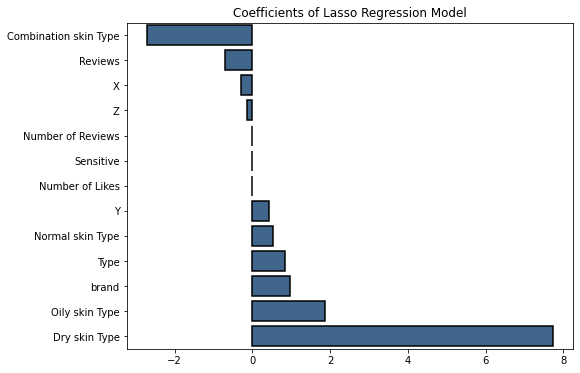

In [485]:
plt.subplots(figsize=(8,6))
ax=sns.barplot(x_data[idx],y_data[idx],
              color=(0.2,0.4,0.6),
              edgecolor=(0,0,0),
              linewidth=1.5)
ax.set_title('Coefficients of Lasso Regression Model')
plt.savefig("lasso_reg_coefficient.png",bbox_inches='tight',dpi=300)

In [ ]:
h=sns.jointplot(pred, y_test, kind='reg',joint_kws={'scatter_kws':dict(alpha=0.5)})
h.fig.suptitle('Observed Price vs Predicted Price')
h.ax_joint.set_xlabel('$\\sf{Predicted\ Price}$')
h.fig.tight_layout()
plt.savefig('Jointplot Observed vs Predicted',bbox_inches='tight',dpi=300)

C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


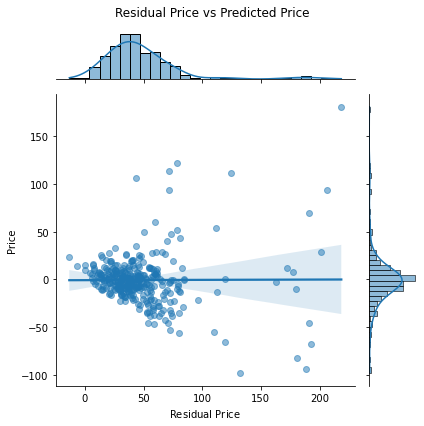

In [448]:
h=sns.jointplot(pred, y_test - pred, kind='reg',joint_kws={'scatter_kws':dict(alpha=0.5)})
h.ax_joint.set_alpha(0.5)
h.fig.suptitle('Residual Price vs Predicted Price')
h.ax_joint.set_xlabel('$\\sf{Residual\ Price}$')
h.fig.tight_layout()
plt.savefig('Jointplot Residuals vs Predicted',bbox_inches='tight',dpi=300)

Ridge Regression R2 train: 0.5660347962472863
Ridge Regression MSE: 961.9267698453205
Ridge Regression R2 test: 0.6316634831565927
Ridge Regression MSE: 725.4086545605701
Mean absolute error: 16.341349659828175
0.60296333055388


C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


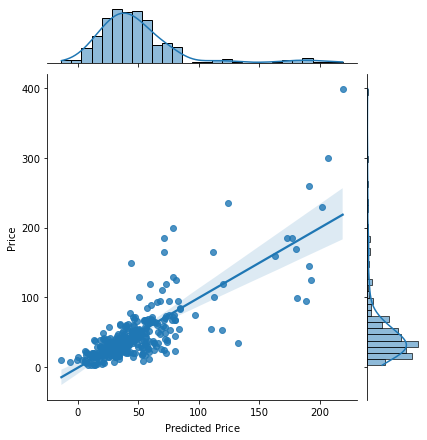

In [433]:
ridge_Regression(X_train,X_test,y_train,y_test)

In [151]:
ridge_model=RidgeCV(alphas=alphas,cv=kfold)
ridge_model.fit(X_train,y_train)
alpha=ridge_model.alpha_
print(f'alpha: {alpha}')
pred_ridge=ridge_model.predict(X_test)

alpha: 121.7382727739662


In [152]:
r_squared_train_ridge=ridge_model.score(X_train,y_train)
r_squared_train_ridge

0.02972024054066924

In [153]:
r_squared_test_ridge=ridge_model.score(X_test,y_test)
r_squared_test_ridge

0.04425544806314363

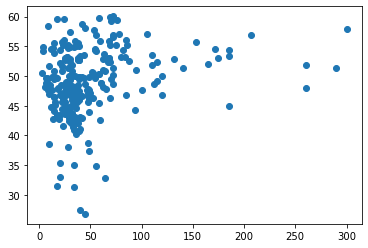

In [154]:
plt.scatter(y_test,pred_ridge)

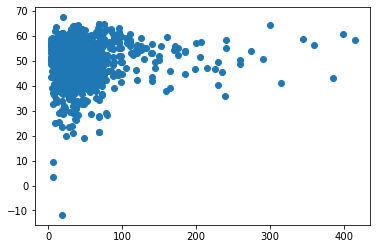

In [166]:
predict1=cross_val_predict(ridge_model,seph4,seph2['Price'],cv=kfold)
plt.scatter(seph2['Price'],predict1)

In [185]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
poly = PolynomialFeatures()

lm_poly = LinearRegression()
lm_poly.fit(poly.fit_transform(X_train), y_train)
y_pred = lm_poly.predict(poly.transform(X_test))
print("Polynomial Regression:", r2_score(y_test, y_pred))

Polynomial Regression: 0.031123463736807522


In [434]:
poly_regression(X_train,X_test,y_train,y_test)

Polynomial Regression R2 train: 0.5519664645568689
Polynomial Regression MSE: 742.6931222126378
Polynomial Regression R2 test: 0.6380944229655923
Polynomial Regression MSE: 900.4197969612677
Mean absolute error: 16.266033168424954
Polynomial Regression: 0.5427990972750814
0.6020429393585657


Linear Regression R2 train: 0.5660359797284799
Linear Regression MSE: 961.9241465422723
Linear Regression R2 test: 0.6315946194979353
Linear Regression MSE: 725.5442759059716
Mean absolute error: 16.350876950776296
[0.48764342 0.59103338 0.57216056 0.71526064 0.6441167 ]


C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


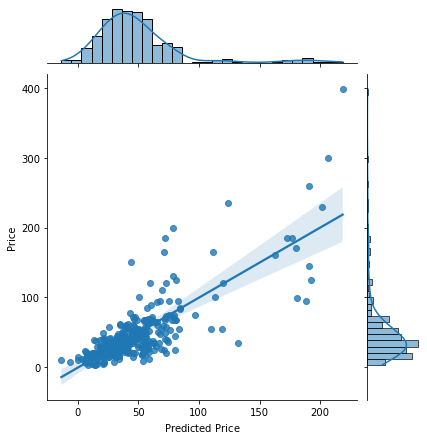

In [439]:
linear_Regression(X_train,X_test,y_train,y_test)

In [209]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 318 to 472
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Reviews                251 non-null    float64
 1   Number of Likes        251 non-null    int64  
 2   Number of Reviews      251 non-null    int64  
 3   Normal skin Type       251 non-null    int64  
 4   Oily skin Type         251 non-null    int64  
 5   Dry skin Type          251 non-null    int64  
 6   Combination skin Type  251 non-null    int64  
 7   Sensitive              251 non-null    int64  
 8   X                      251 non-null    float32
 9   Y                      251 non-null    float32
 10  Z                      251 non-null    float32
dtypes: float32(3), float64(1), int64(7)
memory usage: 20.6 KB


In [297]:

rf = RandomForestRegressor(n_estimators=100, max_features=8, max_depth=4)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest Regression:", r2_score(y_test, y_pred))

rf_mse=mean_squared_error(y_test,rf.predict(X_test))
print(rf_mse)

Random Forest Regression: 0.5741042380874923
838.7668816538921


In [438]:
rf = RandomForestRegressor(n_estimators=2000, max_features=10, max_depth=4)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
print('Train Random Forests R2: {}'.format(r2_score(y_train, y_pred)))
y_pred = rf.predict(X_test)
print('Test Random Forests R2: {}'.format(r2_score(y_test, y_pred)))
rf_mse=mean_squared_error(y_test,rf.predict(X_test))
print('Root mean squared Random Forest:{}'.format(rf_mse))
print(f'Mean absolute error: {mean_absolute_error(y_test,y_pred)}')
scores = cross_val_score(rf, X_test, y_test, cv=kfold)
print(scores.mean())

Train Random Forests R2: 0.7345034931171539
Test Random Forests R2: 0.5694558996885679
Root mean squared Random Forest:847.9214040802947
Mean absolute error: 16.991520949211548
0.5245535472028003


C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


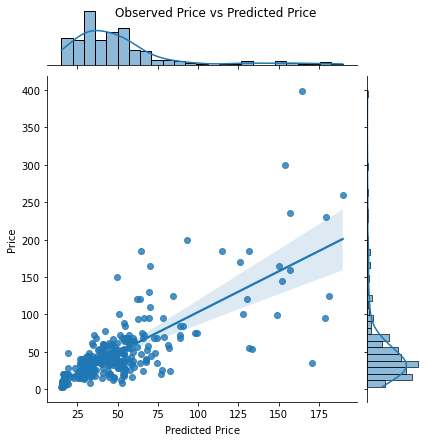

In [436]:
h=sns.jointplot(y_pred, y_test, kind='reg')
h.ax_joint.set_xlabel('$\\sf{Predicted\ Price}$')
h.fig.suptitle('Observed Price vs Predicted Price')
plt.savefig('Joint Plot of Predicted Price vs Price',bbox_inches='tight',dpi=300)

C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


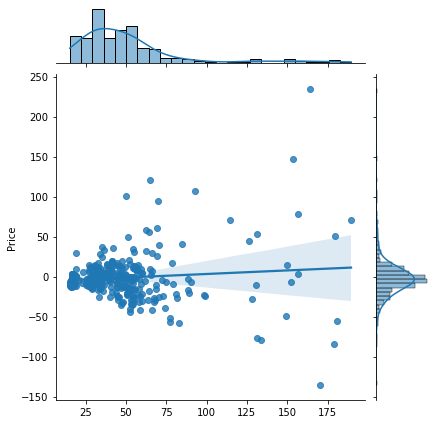

In [437]:
sns.jointplot(y_pred, y_test - y_pred, kind='reg')
h.fig.suptitle('Residual Price vs Predicted Price')
h.ax_joint.set_xlabel('$\\sf{Residual\ Price}$')
plt.savefig('Joint Plot of Residual Price vs Price',bbox_inches='tight',dpi=300)

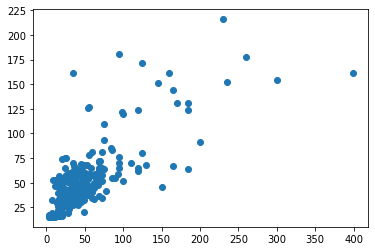

In [308]:
plt.scatter(y_test,y_pred)

In [303]:
gbm = GradientBoostingRegressor(n_estimators=500, max_depth=10, learning_rate=.002,min_samples_split=3)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
print("Gradient Boosted Regression:", r2_score(y_test, y_pred))

Gradient Boosted Regression: 0.4213023562533269


In [304]:
gbm_mse=mean_squared_error(y_test,gbm.predict(X_test))
print(gbm_mse)

1139.6976947743537


In [305]:
scores = cross_val_score(gbm_fit, X_test, y_test, cv=kfold)
print(scores)

[0.19525173 0.23488937 0.20822238 0.35913021 0.48575996]


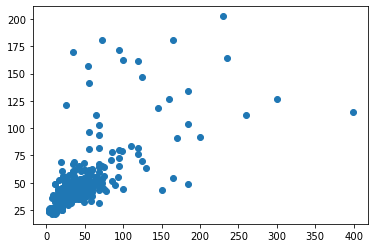

In [306]:
plt.scatter(y_test,y_pred)

In [310]:
def build_grid_search_est(model, X, y, cv=5, **params):

    grid_est = GridSearchCV(model, param_grid=params, cv=kfold, 
                            return_train_score=False)
    grid_est.fit(X, y)
    df = pd.DataFrame(grid_est.cv_results_)
    for param in params:
        df[param] = df.params.apply(lambda val: val[param])
#       plt.plot(np.log(df.alpha), df.mean_test_score);
        plt.semilogx(df.alpha, df.mean_test_score)
    return grid_est

Lasso Grid Search


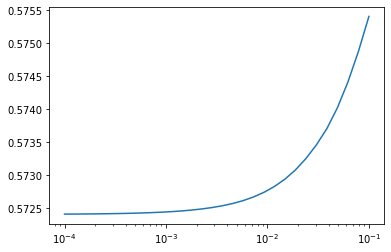

In [311]:
print("Lasso Grid Search")
lasso_grid_est = build_grid_search_est(Lasso(), X_train, y_train, cv=kfold,
                                       alpha=np.logspace(-4, -1, 30))

Ridge Grid Search


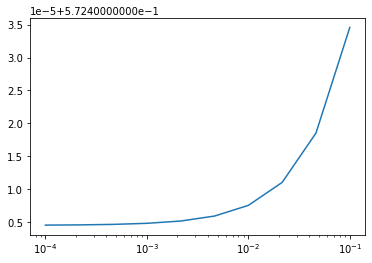

In [312]:
print("Ridge Grid Search")
ridge_grid_est = build_grid_search_est(Ridge(), X_train, y_train, cv=kfold,
                                       alpha=np.logspace(-4, -1, 10))

Elastic Net Grid Search


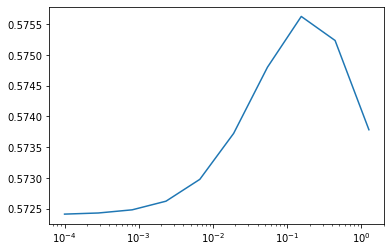

In [313]:
print("Elastic Net Grid Search")
elastic_net_grid_est = build_grid_search_est(ElasticNet(), X_train, y_train, cv=kfold,
                                             alpha=np.logspace(-4, 0.1, 10))

In [444]:
rf = RandomForestRegressor(n_estimators=2000, max_features=10, max_depth=4)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
print('Train Random Forests R2: {}'.format(r2_score(y_train, y_pred)))
y_pred = rf.predict(X_test)
print('Test Random Forests R2: {}'.format(r2_score(y_test, y_pred)))
rf_mse=mean_squared_error(y_test,rf.predict(X_test))
print('Root mean squared Random Forest:{}'.format(rf_mse))
scores = cross_val_score(rf, X_test, y_test, cv=kfold)
print(scores)

Train Random Forests R2: 0.7356242573720871
Test Random Forests R2: 0.5655544074965817
Root mean squared Random Forest:855.605073964621
[0.36275527 0.6034779  0.40562534 0.56416106 0.66260326]
